In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading data
loan_data=pd.read_csv('data/loan.csv',low_memory=False)

In [8]:
# Dropping all columns with only null values
loan_data_new=loan_data.dropna(axis=1,how='all')
loan_data.shape

(39717, 111)

In [9]:
#Remove columns with only one unique values
loan_data_new= loan_data_new.loc[:,loan_data_new.nunique()!=1]
loan_data_new.shape

(39717, 48)

In [11]:
# Drop columns with more than 50% null values
loan_data_new=loan_data_new.loc[:,round(loan_data_new.isnull().sum()/len(loan_data_new)*100,2)<50]
loan_data_new.shape

(39717, 45)

In [279]:
drop_columns=['id','member_id','loan_amnt','funded_amnt_inv','emp_title','earliest_cr_line','url','total_acc','open_acc','desc','title','zip_code','issue_d','sub_grade','last_credit_pull_d','last_pymnt_d']
loan_data_new=loan_data_new.drop(drop_columns,axis=1)
loan_data_new.dtypes

drop_columns1=['total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_amnt']
loan_data_new=loan_data_new.drop(drop_columns1,axis=1)

In [280]:
# As we only want to find out potential defaults, we should remove 'current' from loan status
loan_data_new=loan_data_new[loan_data_new.loan_status !='Current']
loan_data_new=loan_data_new.loc[:,loan_data_new.nunique()!=1]

In [281]:
loan_data_new.dtypes

funded_amnt               int64
term                     object
int_rate                 object
installment             float64
grade                    object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_pymnt             float64
total_pymnt_inv         float64
total_rec_prncp         float64
pub_rec_bankruptcies    float64
dtype: object

In [282]:
# Converting revol_util and int_rate into a numeric type
loan_data_new.revol_util=loan_data_new.revol_util.str.rstrip('%').astype('float')
loan_data_new.int_rate=loan_data_new.int_rate.str.rstrip('%').astype('float')

# Creating a profit and loss column
loan_data_new['PnL']=round((loan_data_new['total_pymnt']-loan_data_new['funded_amnt'])*100/loan_data_new['funded_amnt'],2)

# Creating a column whihc is ratio of funded amount and annual income
loan_data_new['loan_inc_ratio']=round(loan_data_new.funded_amnt*100/loan_data_new.annual_inc,0)

print(loan_data_new.groupby(['grade'])['PnL'].median())
print(loan_data_new[(loan_data_new['inq_last_6mths']<3)].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['home_ownership']!='OWN')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['home_ownership']!='OWN')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['purpose']!='medical')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['purpose']!='renewable_energy')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|(loan_data_new['purpose']!='small_business')].groupby('grade')['PnL'].median())
print(loan_data_new[(loan_data_new['grade']!='G')|((loan_data_new['home_ownership']!='OWN')&(~loan_data_new['purpose'].isin(['small_business','medical','renewable_energy'])))].groupby('grade')['PnL'].median())
#loan_data_new[(loan_data_new['grade']=='G')&(loan_data_new['emp_length']=='na')][['grade','emp_length']]
#loan_data_new.groupby(['emp_length','grade'])['term'].count()
print(loan_data_new[(loan_data_new['grade']=='G')&(loan_data_new['emp_length']=='< 1 year')]['purpose'].value_counts())


grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.24
Name: PnL, dtype: float64
grade
A    10.28
B    16.22
C    20.63
D    23.50
E    26.57
F    28.38
G    31.38
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    29.825
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    29.825
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.71
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    29.64
Name: PnL, dtype: float64
grade
A    10.280
B    16.160
C    20.610
D    23.230
E    26.560
F    28.340
G    31.405
Name: PnL, dtype: float64
grade
A    10.28
B    16.16
C    20.61
D    23.23
E    26.56
F    28.34
G    33.45
Name: PnL, dtype: float64
debt_consolidation    17
credit_card            6
small_business         6
wedding                1
educati

In [146]:
print("% of data points left",round(loan_data_new.size/loan_data.size*100,2))
print("% defaults in the remaining data set:",round(sum(loan_data_new.loan_status=='Charged Off')*100/len(loan_data_new),1))

% of data points left 21.0
% defaults in the remaining data set: 14.6


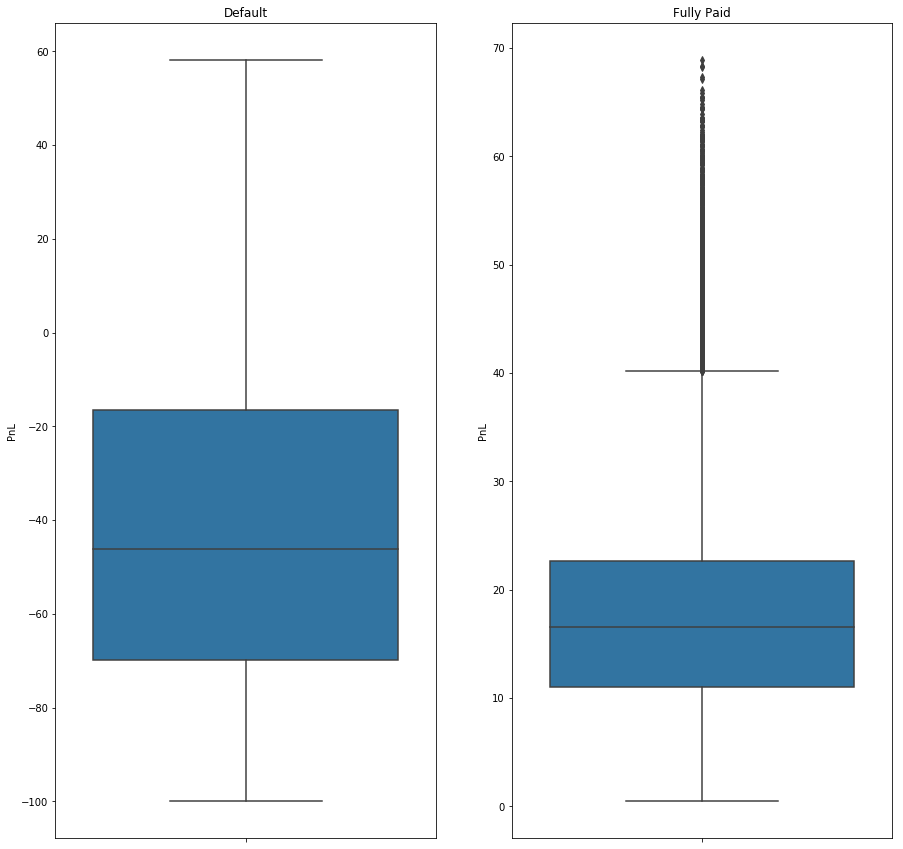

In [147]:
#Relationship of Funded Amount with defaults
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=loan_data_new[loan_data_new.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=loan_data_new[loan_data_new.loan_status=='Fully Paid'].PnL)
plt.show()

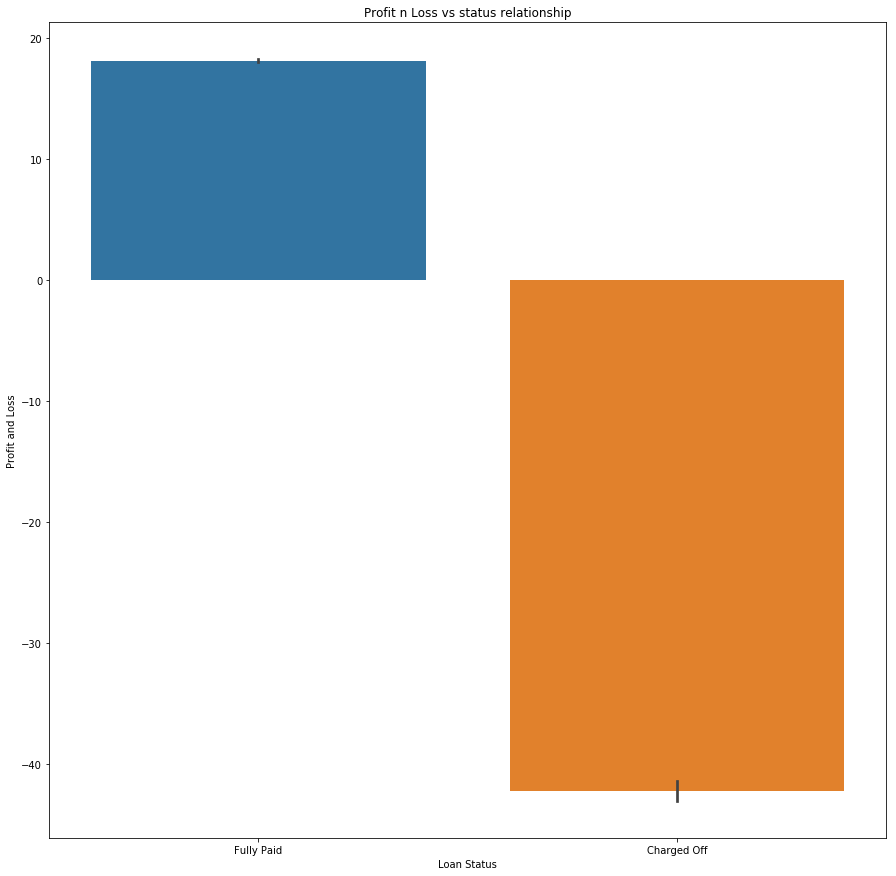

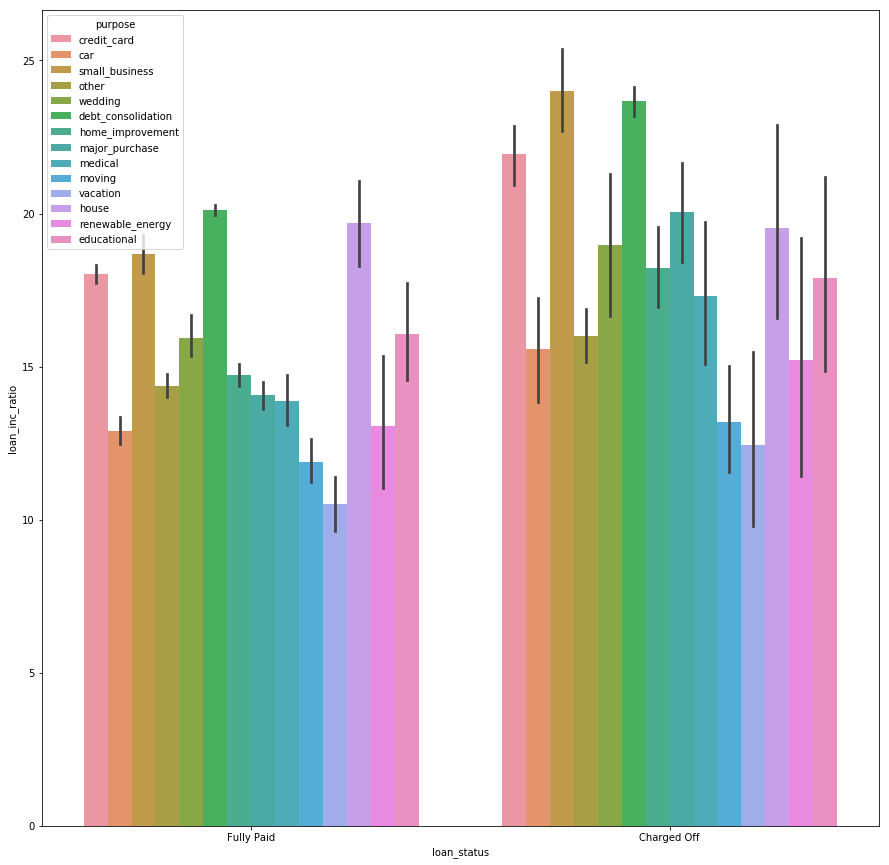

In [148]:
# Relationship of default with funded amount with a barplot
plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='PnL',data=loan_data_new)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()


plt.figure(figsize=(15,15))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=loan_data_new)

plt.show()

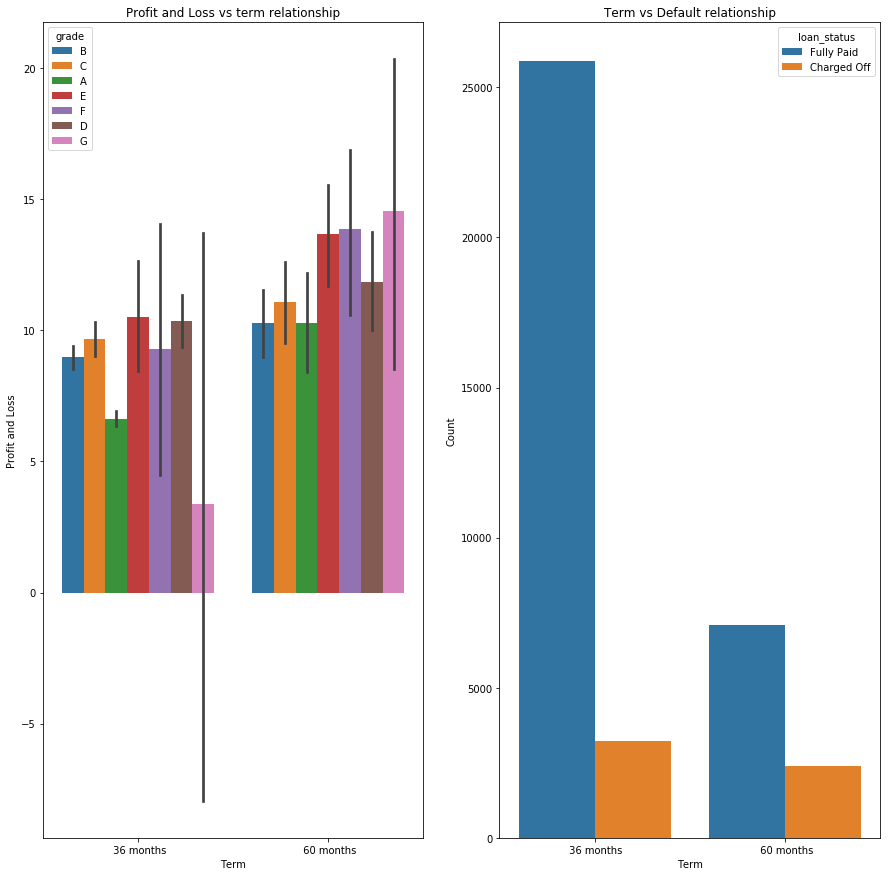

In [150]:
# Relationship of default with term with a barplot
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='term',y='PnL',data=loan_data_new,hue='grade')
plt.xlabel("Term")
plt.ylabel("Profit and Loss")

plt.title("Profit and Loss vs term relationship")


plt.subplot(1,2,2)
sns.countplot('term',hue='loan_status',data=loan_data_new)
plt.xlabel("Term")
plt.ylabel("Count")
plt.title("Term vs Default relationship")
plt.show()



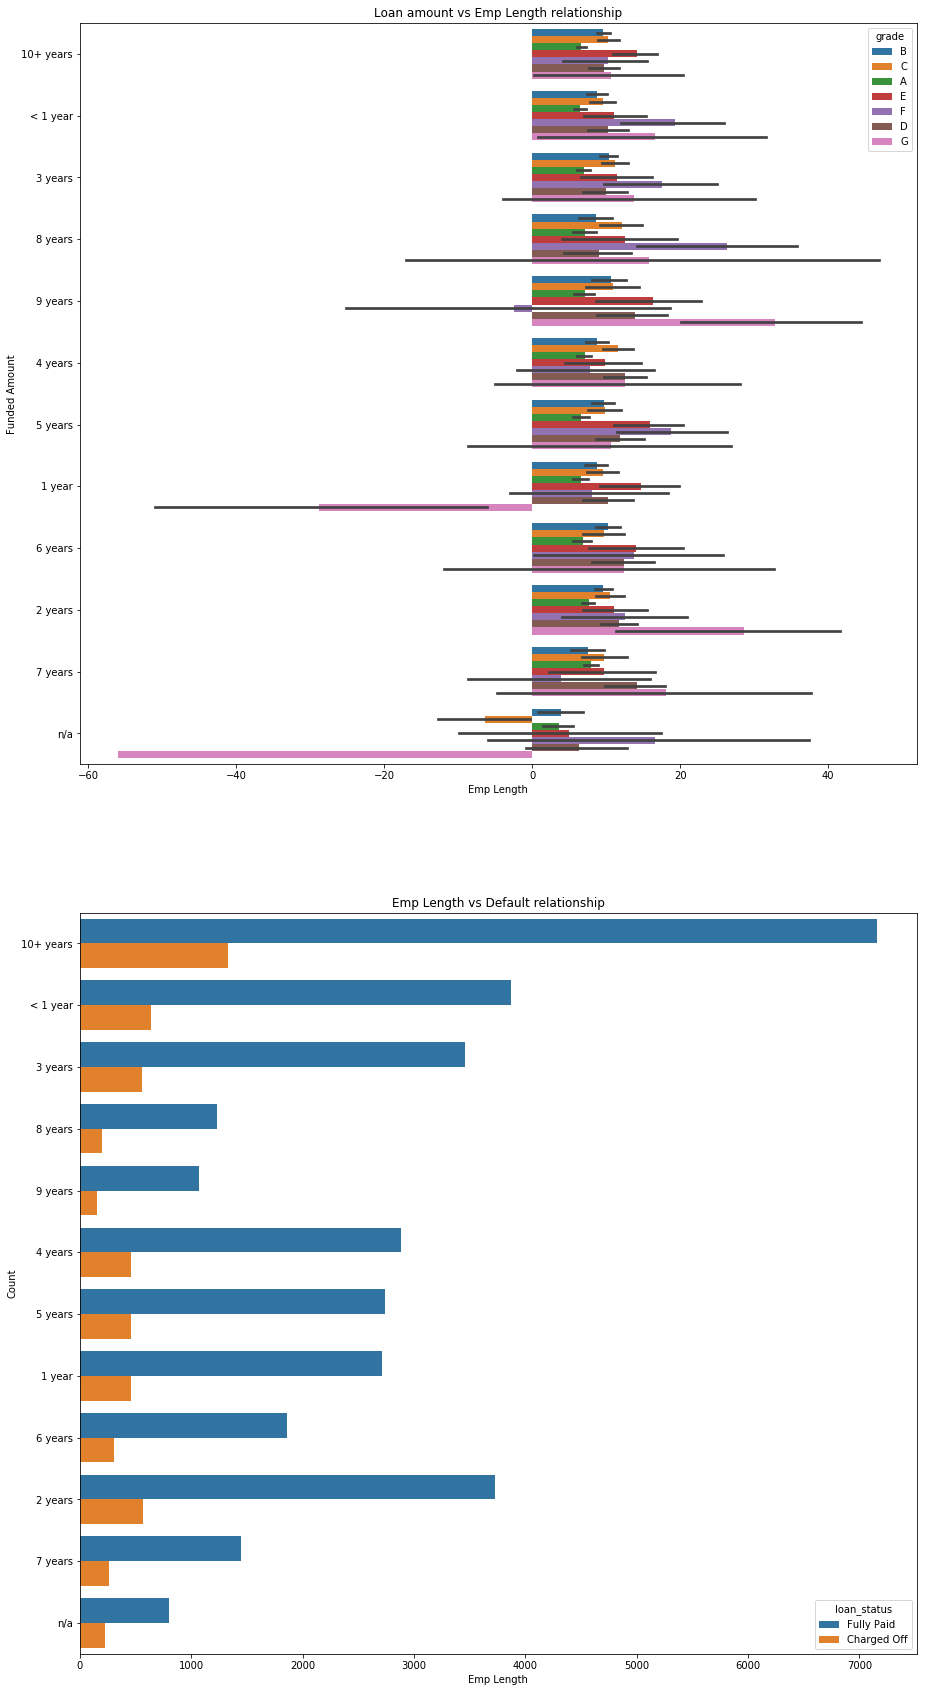

In [151]:
# Relationship of default with term with a barplot
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='emp_length',x='PnL',data=loan_data_new,hue='grade')
plt.xlabel("Emp Length")
plt.ylabel("Funded Amount")

plt.title("Loan amount vs Emp Length relationship")


plt.subplot(2,1,2)
sns.countplot(y='emp_length',hue='loan_status',data=loan_data_new)
plt.xlabel("Emp Length")
plt.ylabel("Count")
plt.title("Emp Length vs Default relationship")
plt.show()

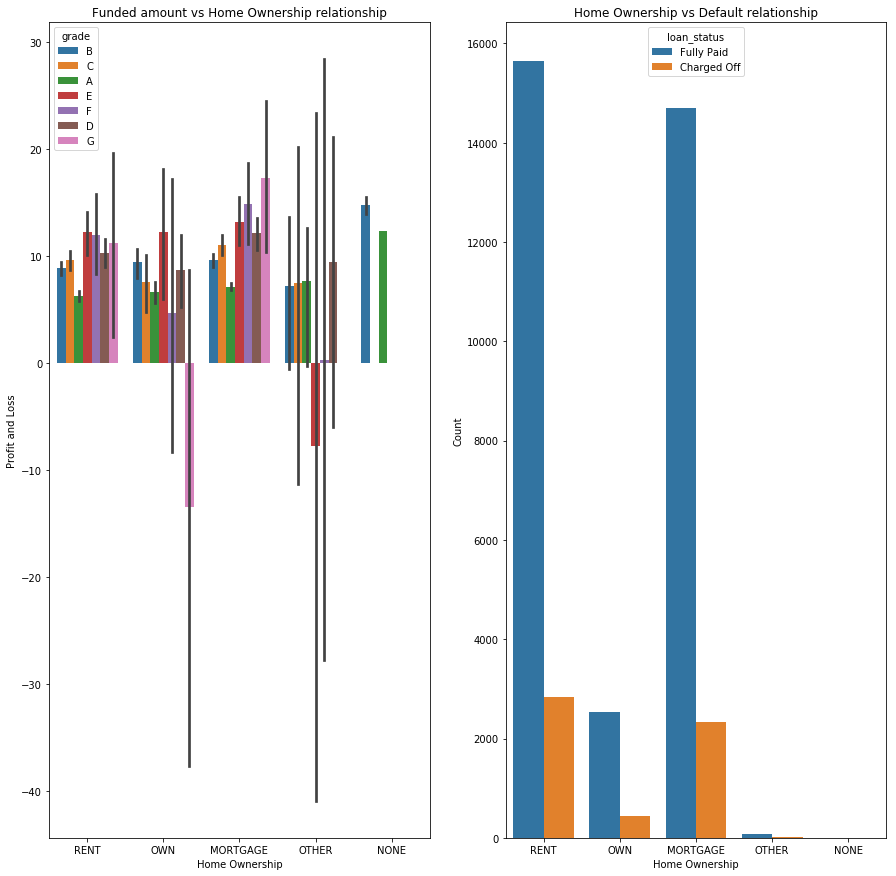

In [152]:
plt.figure(figsize=(15,15))

plt.subplot(1,2,1)
sns.barplot(x='home_ownership',y='PnL',data=loan_data_new,hue='grade')
plt.xlabel("Home Ownership")
plt.ylabel("Profit and Loss")

plt.title("Funded amount vs Home Ownership relationship")


plt.subplot(1,2,2)
sns.countplot(x='home_ownership',hue='loan_status',data=loan_data_new)
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.title("Home Ownership vs Default relationship")
plt.show()

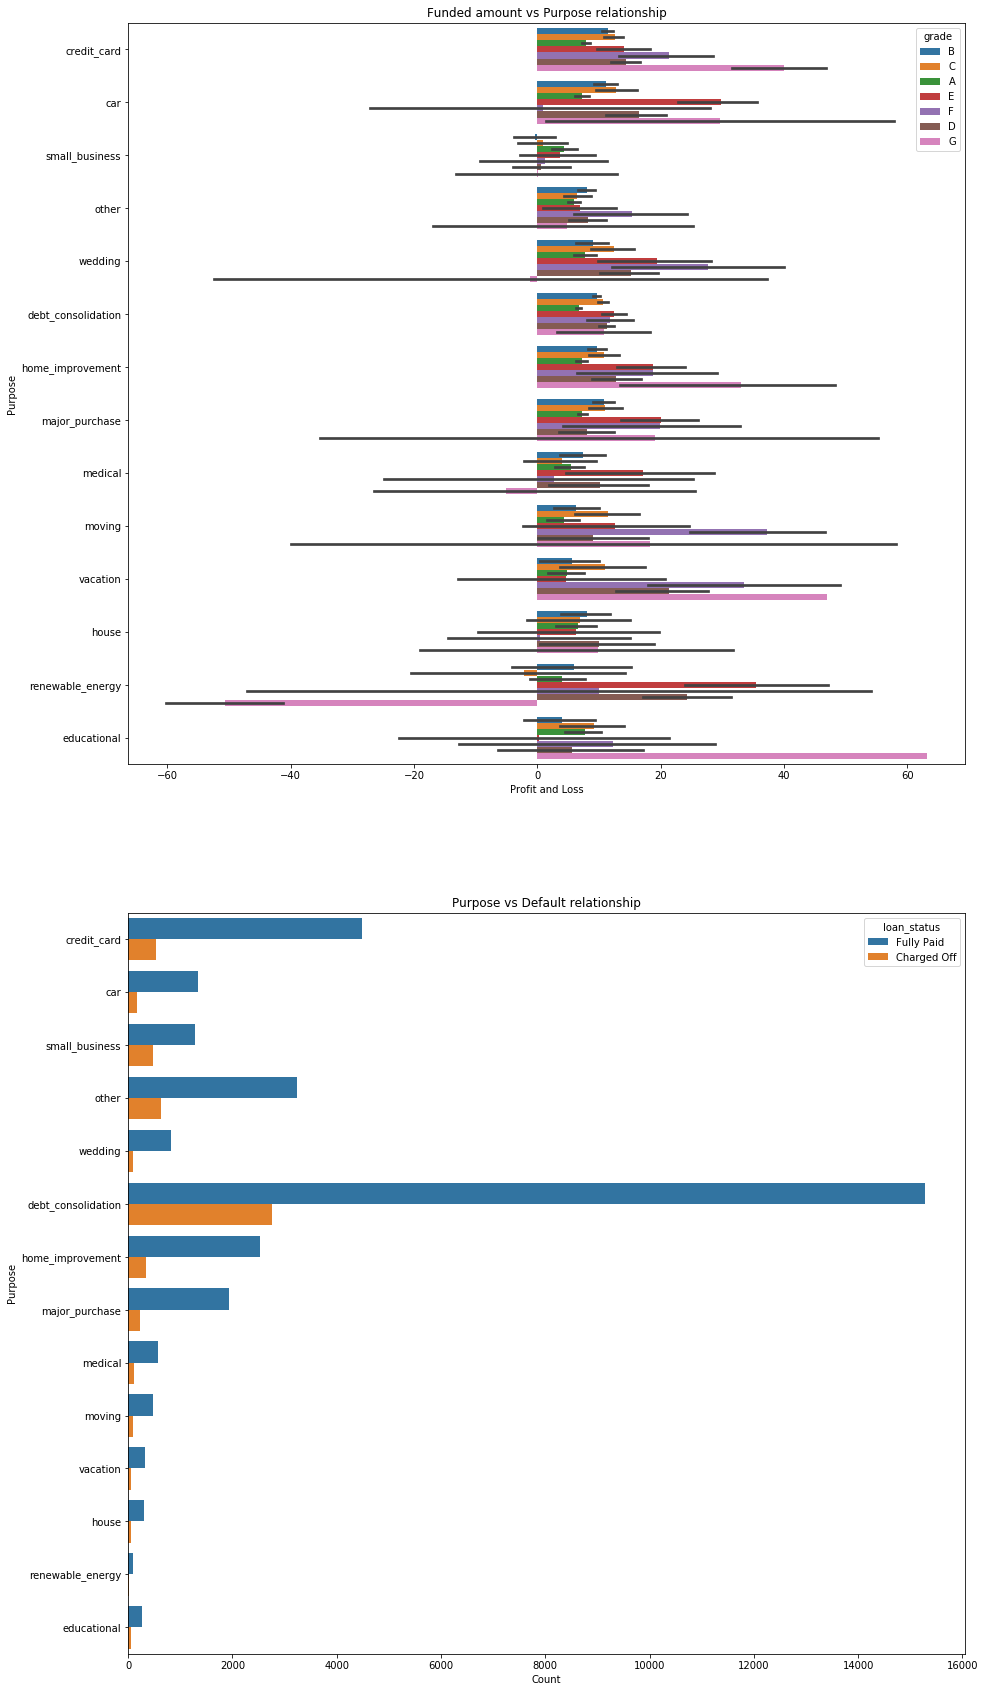

In [153]:
plt.figure(figsize=(15,30))

plt.subplot(2,1,1)
sns.barplot(y='purpose',x='PnL',data=loan_data_new,hue='grade')
plt.ylabel("Purpose")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")


plt.subplot(2,1,2)
sns.countplot(y='purpose',hue='loan_status',data=loan_data_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

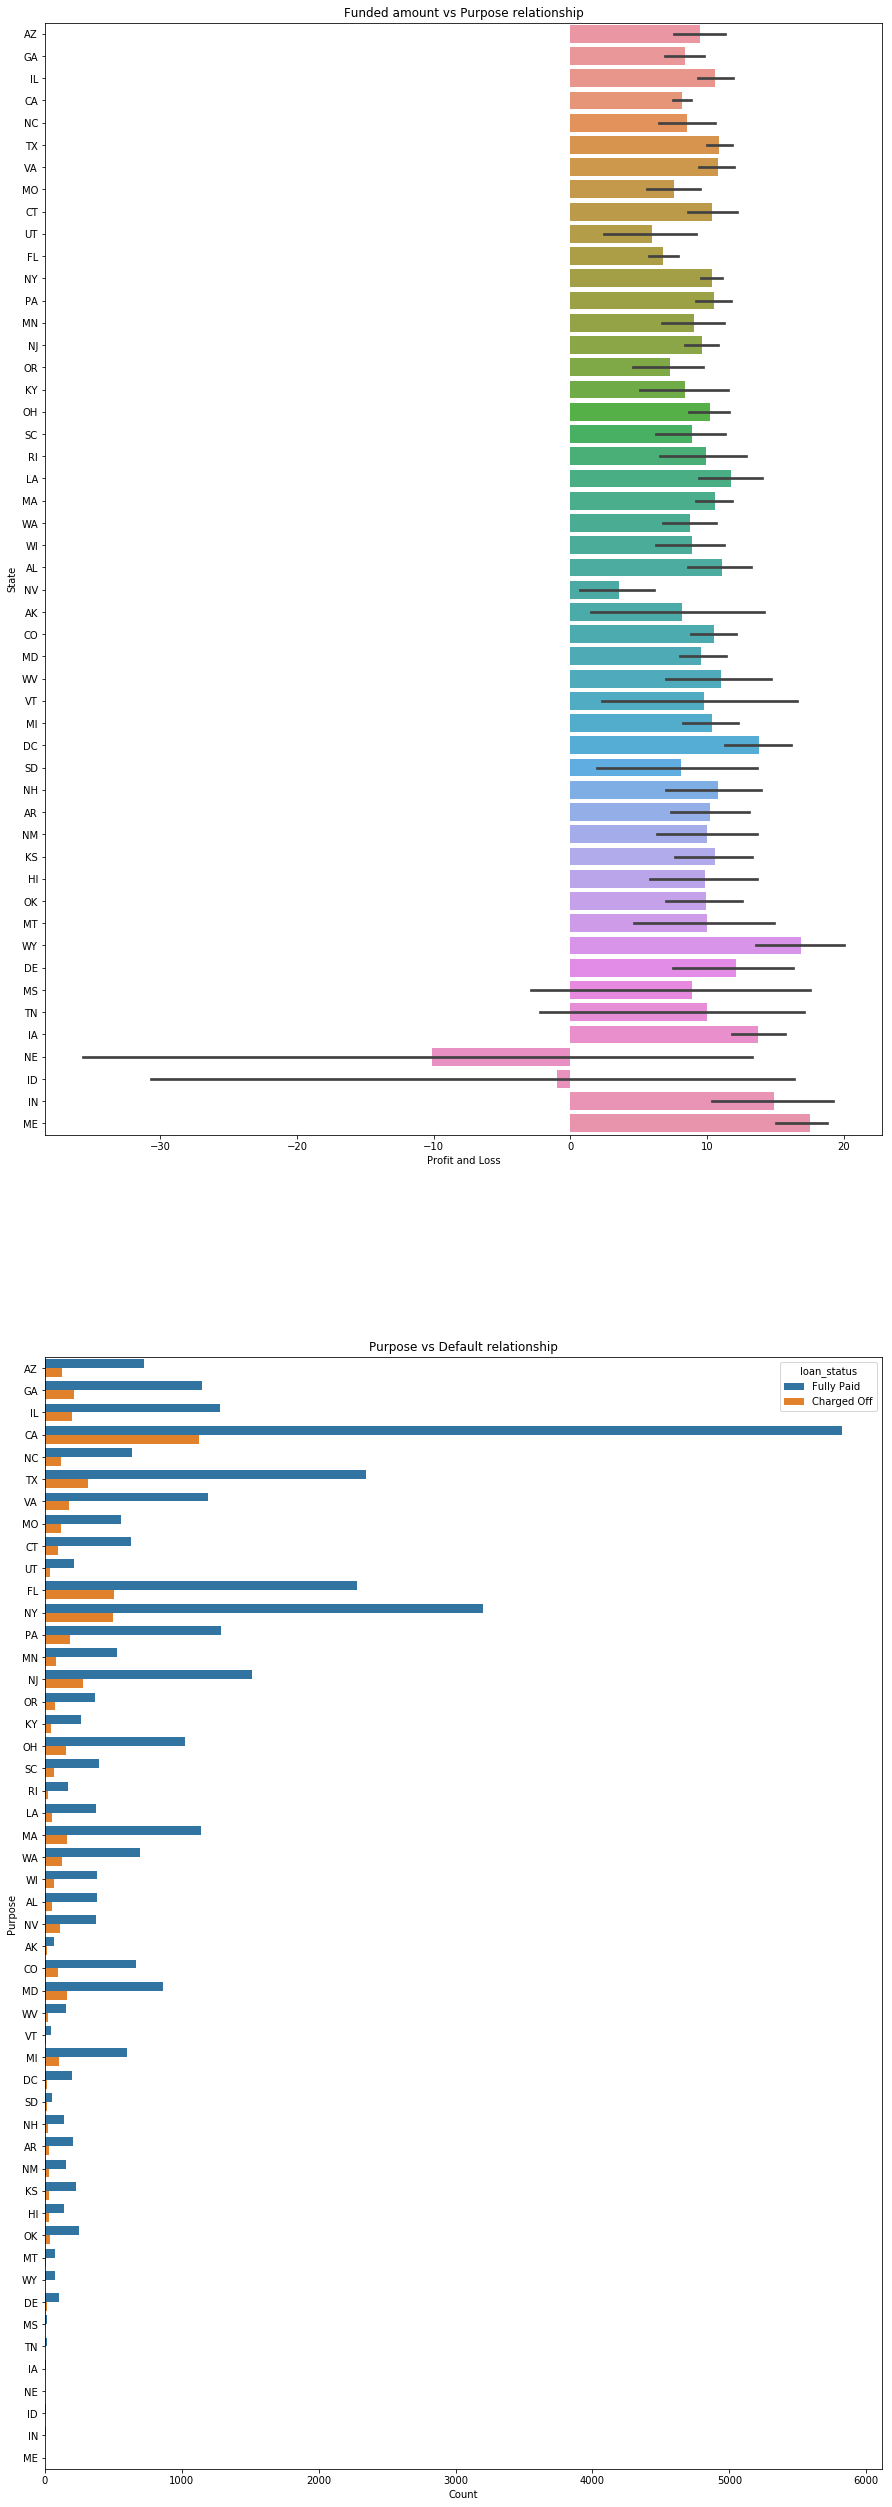

In [154]:
plt.figure(figsize=(15,45))

plt.subplot(2,1,1)
sns.barplot(y='addr_state',x='PnL',data=loan_data_new)
plt.ylabel("State")
plt.xlabel("Profit and Loss")

plt.title("Funded amount vs Purpose relationship")


plt.subplot(2,1,2)
sns.countplot(y='addr_state',hue='loan_status',data=loan_data_new)
plt.ylabel("Purpose")
plt.xlabel("Count")
plt.title("Purpose vs Default relationship")
plt.show()

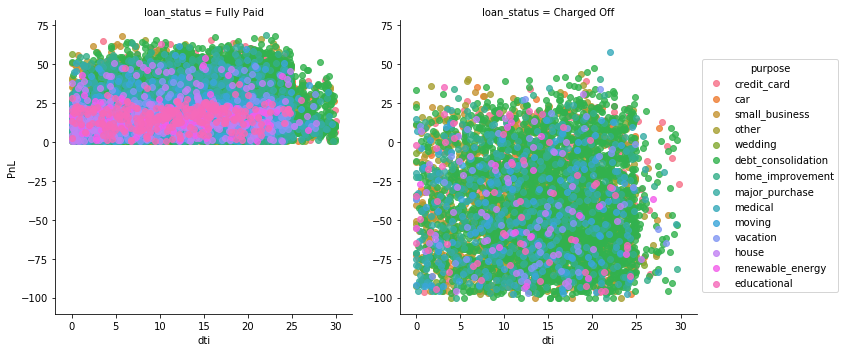

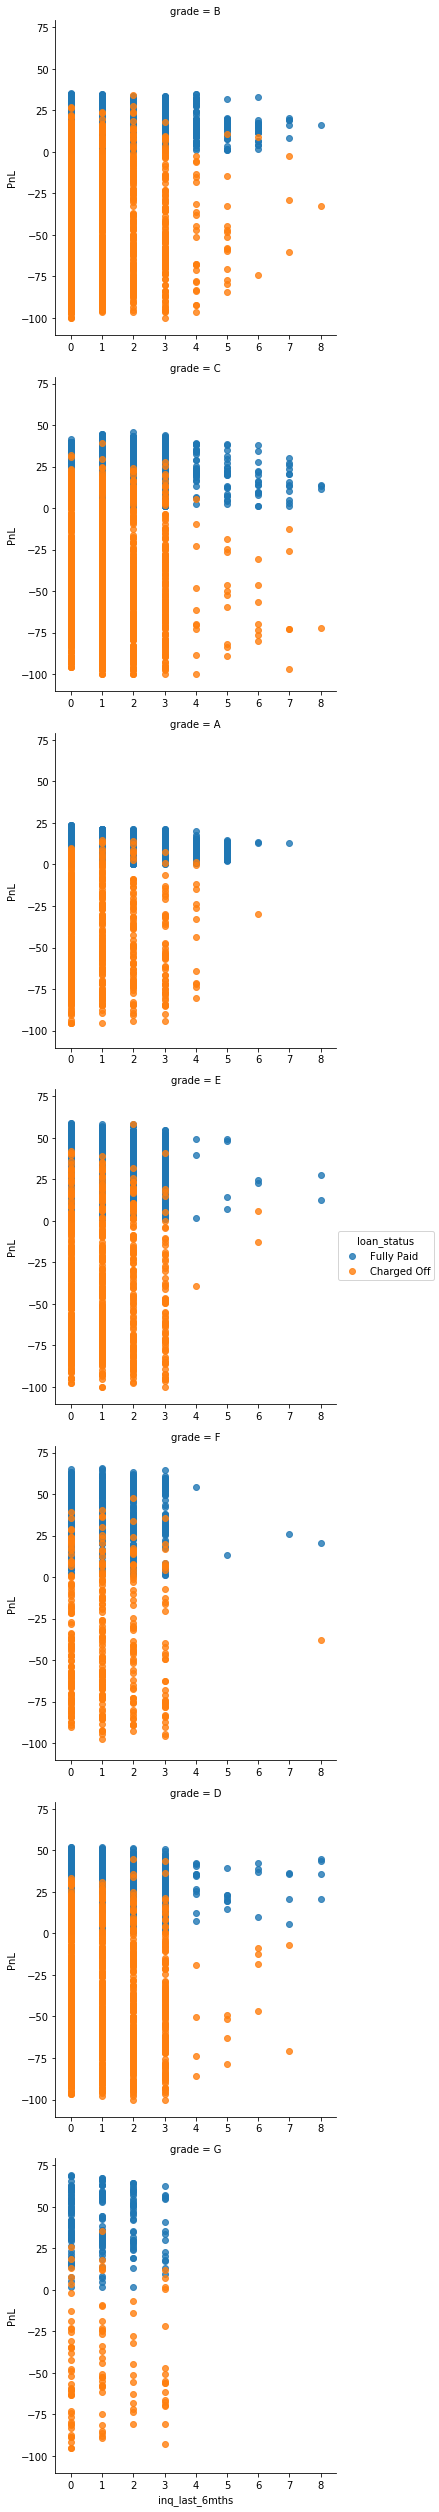

In [156]:
# Trying to see influence of loan amount and DTI on profitability of individual loans

plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan_data_new)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='dti',y='PnL',row='grade',hue='loan_status',fit_reg=False,data=loan_data_new)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='funded_amnt',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan_data_new)

plt.show()

plt.figure(figsize=(15,15))

sns.lmplot(x='inq_last_6mths',y='PnL',hue='loan_status',row='grade',fit_reg=False,data=loan_data_new)

plt.show()

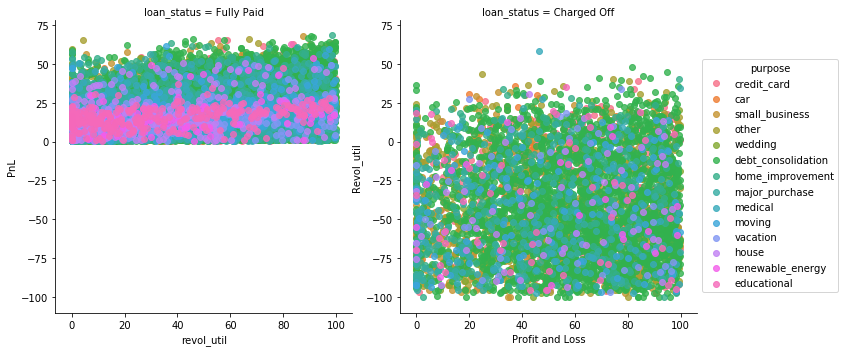

In [43]:
plt.figure(figsize=(15,45))


sns.lmplot(x='revol_util',y='PnL',col='loan_status',hue='purpose',fit_reg=False,data=loan_data_new)
plt.ylabel("Revol_util")
plt.xlabel("Profit and Loss")

plt.show()

In [44]:
# Profitibility vs %age default for employment length


D1=loan_data_new.groupby(['emp_length','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.emp_length.dropna().unique():
    default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['emp_length']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner')

print(D3.sort_values('default_rate'))

D4=loan_data_new.groupby(['emp_length','grade']).agg({'PnL':'median'})

median_profitability={}

for name in loan_data_new.emp_length.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad  default_rate
emp_length                                 
9 years     14.375  15.030799          12.9
2 years     15.380  15.369247          13.2
3 years     15.025  15.589375          13.8
4 years     14.360  16.166513          13.8
8 years     13.920  15.244760          14.1
6 years     15.105  16.634692          14.2
< 1 year    14.380  16.049090          14.2
5 years     14.795  15.858263          14.3
1 year      14.980  16.250998          14.4
7 years     14.890  17.129002          15.4
10+ years   14.380  17.001842          15.7
n/a         11.140  21.302886          22.1
   1 year  10+ years  2 years  3 years  4 years  5 years  6 years  7 years  \
A   10.43       9.95   10.530   10.180   10.520   10.175    9.790   10.425   
B   16.04      16.50   16.140   16.465   15.960   16.365   16.280   16.590   
C   20.28      20.85   20.500   20.500   20.860   20.850   20.995   20.480   
D   23.22      22.96   22.740   23.460   23.780   24.080   23.780   24.4

In [45]:
# Profitibility vs %age default for Purpose


D1=loan_data_new.groupby(['purpose','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.purpose.dropna().unique():
    default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['purpose']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['purpose','grade']).agg({'PnL':'median'})
#print(D4)
median_profitability={}

for name in loan_data_new.purpose.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                    median        mad  default_rate
purpose                                            
major_purchase      12.255  12.909845          10.3
wedding             15.200  13.647210          10.4
car                 12.390  12.225088          10.7
credit_card         15.080  12.707926          10.8
home_improvement    13.510  14.745096          12.1
vacation            12.440  14.866476          14.1
debt_consolidation  15.580  16.987734          15.3
medical             12.610  18.353759          15.6
moving              13.630  17.068547          16.0
house               12.580  17.312434          16.1
other               14.050  17.663163          16.4
educational         15.040  16.716205          17.2
renewable_energy    12.040  18.473449          18.6
small_business      13.140  27.200605          27.1
      car  credit_card  debt_consolidation  educational  home_improvement  \
A   9.740       10.735              10.280       11.820             9.575   
B  16.450     

In [46]:
D1=loan_data_new.groupby(['home_ownership','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.home_ownership.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['home_ownership']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['home_ownership','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.home_ownership.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                median        mad default_rate
home_ownership                                
MORTGAGE         13.80  15.585078         13.7
OWN              13.30  16.306254         14.9
RENT             15.54  16.993062         15.4
OTHER            15.10  17.482070         18.4
NONE             13.97   1.055556          NaT
   MORTGAGE    NONE  OTHER     OWN   RENT
A     9.990    12.4  12.78  10.170  10.48
B    16.280  14.765  15.54  16.085  16.16
C    20.730     NaT     20  20.100  20.54
D    23.220     NaT  23.02  21.720  23.52
E    26.930     NaT  19.19  27.280  26.29
F    28.950     NaT    0.3  22.840  27.15
G    30.915     NaT    NaT -24.790  29.71


In [47]:
D1=loan_data_new.groupby(['addr_state','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.addr_state.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['addr_state']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['addr_state','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.addr_state.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

            median        mad default_rate
addr_state                                
WY          16.770   9.343334            5
DC          15.970  10.993892          7.1
MS          17.500  14.312742         10.5
DE          15.960  14.351265         10.6
VT          13.830  14.917116         11.3
AR          13.790  13.851591         11.5
TN          15.240  11.130035         11.8
TX          15.010  14.308892         11.9
KS          14.310  14.546558         12.2
WV          16.260  15.188838         12.2
MA          14.170  14.284626         12.3
PA          14.425  14.378973         12.3
AL          15.010  13.936534         12.4
LA          14.620  13.836607         12.4
CO          14.275  14.393962         12.8
VA          14.620  14.185086         12.9
CT          14.310  15.168978         12.9
RI          13.890  13.831458         12.9
OH          15.440  15.966677         13.2
MT          12.690  15.262317         13.3
IL          15.395  15.273412         13.3
MN         

In [48]:
D1=loan_data_new.groupby(['verification_status','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.verification_status.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['verification_status']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['verification_status','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.verification_status.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                     median        mad  default_rate
verification_status                                 
Not Verified         13.860  14.185388          12.8
Source Verified      14.310  16.809369          14.8
Verified             16.095  18.820223          16.8
   Not Verified  Source Verified  Verified
A         10.36            9.830    10.410
B         16.14           16.160    16.520
C         20.07           20.755    20.960
D         22.74           23.980    23.470
E         26.01           27.280    26.665
F         26.26           29.725    28.705
G         25.83           29.160    29.640


In [49]:
#loan_data_new['delinq_2yrs']=loan_data_new['delinq_2yrs'].astype('category')
D1=loan_data_new.groupby(['delinq_2yrs','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.delinq_2yrs.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['delinq_2yrs']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['delinq_2yrs','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.delinq_2yrs.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

             median        mad default_rate
delinq_2yrs                                
6            19.420  15.116400           10
5            21.400  16.176009         14.3
0            14.280  16.022047         14.4
1            17.420  17.945354         15.8
3            20.100  20.767530         16.5
2            18.050  20.026794         19.3
4            22.270  23.638444         21.7
7            24.805  43.492500           25
8           -28.195  43.675000           50
9            24.420   0.000000          NaT
11           17.420   0.000000          NaT
       0       1       2       3       4       5       6      7      8   \
A  10.240  10.870  11.030   9.875 -13.140     NaT     NaT    NaT    NaT   
B  16.160  16.400  15.880  13.660  18.050   11.79    9.22    NaT    NaT   
C  20.600  20.630  20.195  20.870  21.780    21.4   21.77  21.46    NaT   
D  23.455  23.205  21.800  22.805  23.520  25.325  16.115  28.15  15.48   
E  26.480  26.890  18.150  31.260  28.815      28    

C:\Users\sanesanyo\Anaconda3\lib\site-packages\pandas\core\indexes\multi.py:819: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


In [50]:
#loan_data_new['delinq_2yrs']=loan_data_new['delinq_2yrs'].astype('category')
D1=loan_data_new.groupby(['inq_last_6mnths','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.pub_rec_bankruptcies.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['pub_rec_bankruptcies']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['pub_rec_bankruptcies','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.pub_rec_bankruptcies.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                      median        mad  default_rate
pub_rec_bankruptcies                                 
0.0                    14.38  16.015910          14.2
1.0                    16.38  23.259201          22.4
2.0                    21.92  32.145600          40.0
      0.0     1.0    2.0
A  10.210  11.640    NaT
B  16.270  16.090   8.28
C  20.750  19.520  21.92
D  23.780  21.110    NaT
E  26.875  25.880  26.31
F  28.840  14.445    NaT
G  29.780 -34.835    NaT


C:\Users\sanesanyo\Anaconda3\lib\site-packages\pandas\core\indexes\multi.py:819: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


In [81]:
#loan_data_new['delinq_2yrs']=loan_data_new['delinq_2yrs'].astype('category')
D1=loan_data_new.groupby(['inq_last_6mths','loan_status']).agg({'PnL':'count'})
D2=D1.groupby(level=0).apply(lambda x:round(x*100/x.sum(),1))

#print(D1)
# Creating a dataframe for default rate
default_purpose={'default_rate':{}}

for name in loan_data_new.inq_last_6mths.dropna().unique():
    try:
        default_purpose['default_rate'][name]=D2['PnL'][name]['Charged Off']
    except:
        default_purpose['default_rate'][name]=pd.NaT
        
D2=pd.DataFrame(default_purpose)

# Merging default dataframe with median and mad
D1=loan_data_new.groupby(['inq_last_6mths']).agg({'PnL':['median','mad']})

D3=pd.merge(D1['PnL'],D2,left_index=True,right_index=True,how='inner').sort_values('default_rate')

print(D3)

D4=loan_data_new.groupby(['inq_last_6mths','grade']).agg({'PnL':'median'})
median_profitability={}

for name in loan_data_new.inq_last_6mths.dropna().unique():
    median_profitability[name]={}
    for gr in loan_data_new.grade.dropna().unique():
        try:  
            median_profitability[name][gr]=D4['PnL'][name][gr]
        except:
            median_profitability[name][gr]=pd.NaT
print(pd.DataFrame(median_profitability))

                median        mad  default_rate
inq_last_6mths                                 
0               14.020  13.858975          12.2
1               15.270  17.357608          15.7
4               12.000  17.903234          16.1
2               15.670  18.848462          16.7
5               11.570  21.337636          19.4
3               15.110  22.610933          20.8
8               15.055  24.074898          21.4
6               12.010  21.393495          25.4
7               13.175  26.166125          29.4
        0       1       2       3       4       5      6       7       8
A  10.200  10.400  10.270  10.070   10.57   11.08  13.12   12.81     NaT
B  16.470  16.150  16.020  15.605   15.62   13.06  13.98   12.25   -8.21
C  20.785  20.630  19.980  20.030   21.03   11.87   9.76   12.07   12.62
D  23.990  23.095  22.690  21.710   26.18    19.4    0.8  13.225   39.82
E  27.150  25.950  26.160  25.800  20.385  31.145  14.64     NaT  20.265
F  29.395  27.120  27.185  28.510 

C:\Users\sanesanyo\Anaconda3\lib\site-packages\pandas\core\indexes\multi.py:819: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return self._engine.get_value(s, k)


In [52]:
drop_columns2=['installment','term','total_pymnt_inv','total_rec_prncp']

loan_data_new=loan_data_new.drop(drop_columns2,axis=1)



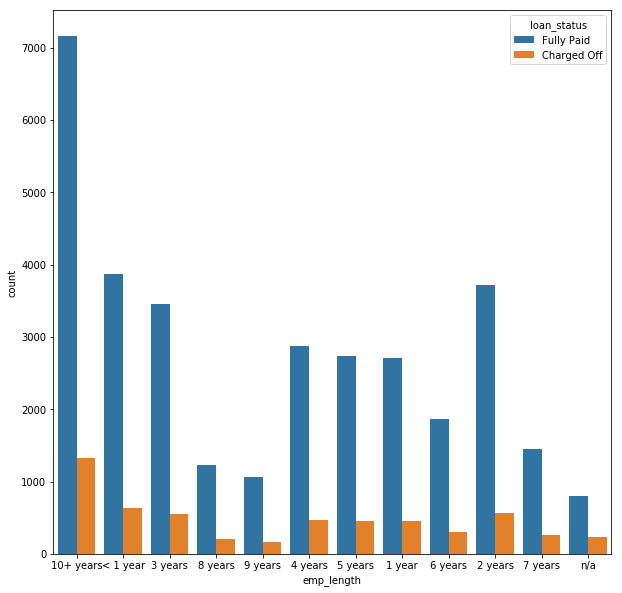

In [53]:
plt.figure(figsize=(10,10))
sns.countplot('emp_length',hue='loan_status',data=loan_data_new)
#sns.barplot(x='loan_status',y='funding_ratio',data=loan_data_new)
#sns.barplot(x='delinq_2yrs',y='loan_amnt',hue='loan_status',data=loan_data_new)
#sns.barplot(x='loan_status',y='install_inc_ratio',hue='home_ownership',data=loan_data_new[loan_data_new.home_ownership])
#fgrid=sns.lmplot(x='funded_amnt',y='funded_amnt_inv',col='loan_status',hue='grade',fit_reg=False,data=loan_data_new)
#ax=fgrid.axes[0][0]
#plt.xscale('log')
#plt.yscale('log')
#g=sns.pairplot(loan_data_new,vars=['loan_amnt','installment','annual_inc'],hue='loan_status')
#ax.set_xscale('log')
#ax.set_yscale('log')
#ax.set_xlim((0,10e6))
plt.show()

In [54]:
# Converting employment length into a nominal variable
mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0

    },
    "grade":{
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    }
}

loan_data_new=loan_data_new.replace(mapping_dict)

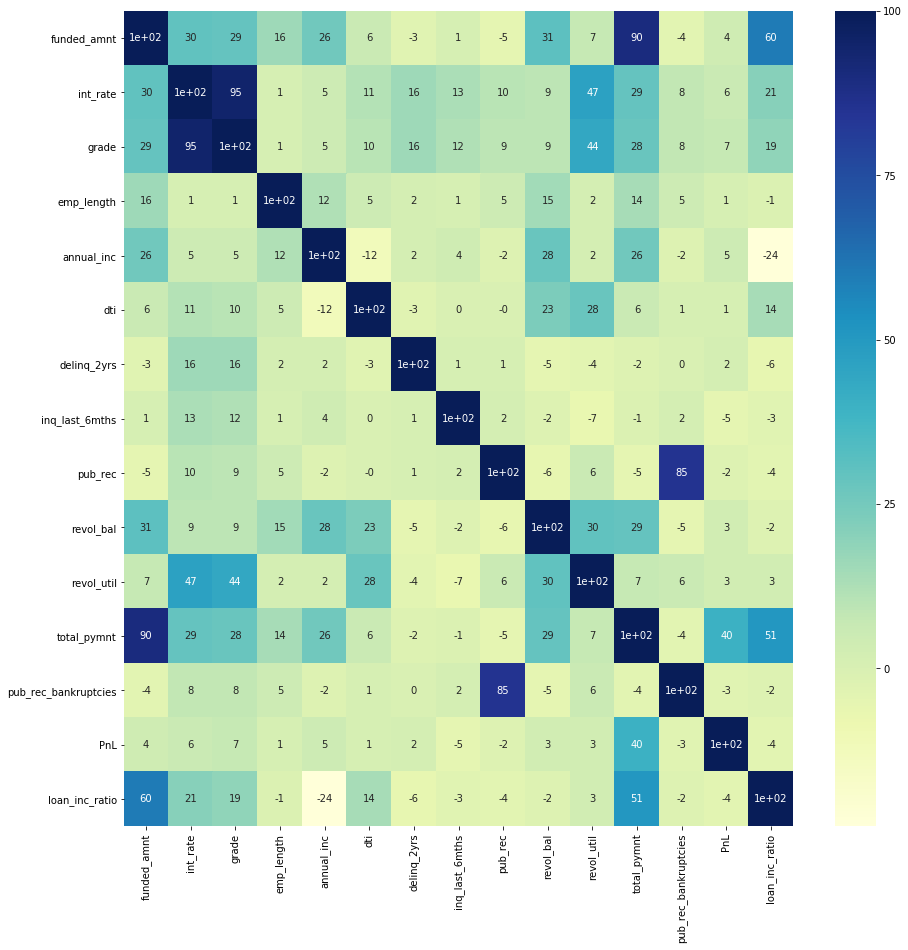

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(round(loan_data_new.corr()*100,0),annot=True,cmap="YlGnBu")
plt.show()

In [79]:
# Creating bins for DTI,loan amount, revol_util and seeing their influence of profitability
loan_data_new['funded_amnt_bins']=pd.cut(loan_data_new['funded_amnt'],7)
print(loan_data_new.groupby(['grade','funded_amnt_bins'])['PnL'].median())


loan_data_new['dti_bins']= pd.cut(loan_data_new['dti'],7)
print(loan_data_new.groupby(['grade','dti_bins'])['PnL'].median())


loan_data_new['revol_util_bins']= pd.cut(loan_data_new['revol_util'],7)
print(loan_data_new.groupby(['grade','revol_util_bins'])['PnL'].median())

grade  funded_amnt_bins      
A      (465.5, 5428.571]          9.810
       (5428.571, 10357.143]     10.380
       (10357.143, 15285.714]    10.310
       (15285.714, 20214.286]    10.760
       (20214.286, 25142.857]    10.970
       (25142.857, 30071.429]    11.255
       (30071.429, 35000.0]      12.350
B      (465.5, 5428.571]         16.080
       (5428.571, 10357.143]     16.150
       (10357.143, 15285.714]    16.420
       (15285.714, 20214.286]    16.770
       (20214.286, 25142.857]    16.320
       (25142.857, 30071.429]    17.260
       (30071.429, 35000.0]      16.490
C      (465.5, 5428.571]         20.480
       (5428.571, 10357.143]     20.480
       (10357.143, 15285.714]    20.650
       (15285.714, 20214.286]    20.810
       (20214.286, 25142.857]    20.850
       (25142.857, 30071.429]    24.590
       (30071.429, 35000.0]      21.130
D      (465.5, 5428.571]         23.220
       (5428.571, 10357.143]     23.220
       (10357.143, 15285.714]    23.760
       (15

In [ ]:
# Look at public records, Debt to Income ratio, inquires in last months, revolving utilization, revolving utilization

loan_data_new.corr()
plt.figure(figsize=(45,45))


fgrid=sns.lmplot(y='funded_amnt',x='annual_inc',fit_reg=False,hue='loan_status',col='term',data=loan_data_new)
ax=fgrid.axes[0][0]
plt.xscale('log')
plt.yscale('log')
plt.ylabel("Loan Inc Ratio")
plt.xlabel("Annual Inc")

plt.show()

loan_data_new.columns